## Lending Club Case Study

**Group Members:**<br>
Dinesh Arumugam<br>
Jesinth Nalini<br>

**Business Objectives:**<br>
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.<br>

Objective is to identify the risky loan applicants at the time of loan application so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.<br>

In other words, to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.<br>

#### Importing all the required libraries for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import os
import datetime as datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("D:\ML& AI Python\Assignment 2 - Loan dataset")

#### Reading the loan data set

In [3]:
loan = pd.read_csv("loan.csv",encoding='ISO-8859-1')

In [4]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 30.0+ MB


In [6]:
loan.shape

(39717, 111)

In [7]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [9]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Cleaning

**Missing value in percentage (%)**

In [10]:
missing = round(100*(loan.isnull().sum()/len(loan.index)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

**Columns with more than 50% missing values**

In [11]:
columns_with_missing_values = list(missing[missing >= 50].index)

len(columns_with_missing_values)

57

**Dropping columns with more than 50% missing values**

In [12]:
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 54)

**Understand the missing value in detail**

In [13]:
missing = round(100*(loan.isnull().sum()/len(loan.index)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [14]:
loan['desc'].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

**Removing desc column as it has no value and more than 30 % missing data**

In [15]:
loan = loan.drop('desc',axis=1)

**Understanding the values in detail**

In [16]:
print("UNOIQUE VALUES")
print("emp_title : ",len(loan.emp_title.unique()))
print("emp_length : ",len(loan.emp_length.unique()))
print("title : ",len(loan.title.unique()))
print("revol_util : ",   len(loan.revol_util.unique()))
print("title : ",  len(loan.title.unique()))
print("last_pymnt_d : ",   len(loan.last_pymnt_d.unique()))
print("last_credit_pull_d : ",   len(loan.last_credit_pull_d.unique()))
print("collections_12_mths_ex_med : ",   len(loan.collections_12_mths_ex_med.unique()))
print("chargeoff_within_12_mths : ",   len(loan.chargeoff_within_12_mths.unique()))
print("pub_rec_bankruptcies : ",   len(loan.pub_rec_bankruptcies.unique()))
print("tax_liens : ",len(loan.tax_liens.unique()))

UNOIQUE VALUES
emp_title :  28821
emp_length :  12
title :  19616
revol_util :  1090
title :  19616
last_pymnt_d :  102
last_credit_pull_d :  107
collections_12_mths_ex_med :  2
chargeoff_within_12_mths :  2
pub_rec_bankruptcies :  4
tax_liens :  2


**Understanding the unique values**

In [17]:
loan.emp_title.unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [18]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [19]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [20]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [21]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [22]:
loan.tax_liens.unique()

array([ 0., nan])

#### Removing columns 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens', as it has entry as 0 or blank, we can't derive any insights with theses enteries

In [23]:
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(drop_columnlist,axis=1)

In [24]:
loan.shape

(39717, 50)

**Looking at the pub_rec_bankruptcies categorical column where we have 1.76% missing data**

In [25]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [26]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [27]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [28]:
loan=loan[~((loan.emp_title.isnull()) | (loan.emp_length.isnull()) | (loan.title.isnull()) | (loan.revol_util.isnull()) | (loan.last_pymnt_d.isnull()))]

In [29]:
loan.shape

(36433, 50)

In [30]:
missing =round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

Series([], dtype: float64)

**Copying data set as a back up**

In [31]:
dump_loan = loan.copy()

In [32]:
dump_loan.shape

(36433, 50)

**% of Data retained from the original data count**

In [33]:
print(100*(len(loan.index)/39717))

91.73150036508297


**Narrow down the columns for analysis<br>
Analyse all the columns in the resulted dataframe and keeping only the required data for the analysis.**

In [34]:
loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

**Columns with single unique value or columns with all unique values has no value to add in the analysis. Dropping all such columns**<br>
delinq_amnt : value for entire dataset is '0', therefore removing<br>
funded_amnt : value for this column is almost equivalent to loan_amnt<br>
funded_amnt_inv : value for this column is almost equivalent to funded_amnt<br>
application_type : value for entire dataset is 'INDIVIDUAL'

In [35]:
columns_drop = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]

In [36]:
#Dropping the above columns
loan= loan.drop(columns_drop,axis=1)

In [37]:
loan.shape

(36433, 38)

In [38]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [39]:
loan.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
loan_amnt                    863
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection_recovery_fee     2386
dti                         2857
recoveries                  3585
annual_inc                  4924
total_rec_prncp             7254
installmen

**Dropping duplicated rows if any**

In [40]:
loan=loan.drop_duplicates()

**Standardizing the precision value**

In [41]:
loan.total_pymnt.value_counts().tail()
loan.total_rec_late_fee.value_counts().tail()
loan.collection_recovery_fee.value_counts().tail()

18.3264     1
198.4078    1
9.6738      1
33.2896     1
93.3678     1
Name: collection_recovery_fee, dtype: int64

In [42]:
loan.total_pymnt= round(loan.total_pymnt,2)
loan.total_rec_late_fee= round(loan.total_rec_late_fee,2)
loan.collection_recovery_fee= round(loan.collection_recovery_fee,2)

**Changing dtype of Datetime column**

In [43]:
dt_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan[dt_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 853.9+ KB


In [44]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

In [45]:
loan[dt_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


**Removing % from the column values (int_rate, revol_util)**

In [46]:
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [47]:
loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 853.9 KB


**Changing categorical value (object type) to numerical of 'emp_length' by removing 'year(s)'**

In [48]:
loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [49]:
new_emp_length = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [50]:
loan = loan.replace({"emp_length": new_emp_length })

In [51]:
loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [52]:
loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

**Changing categorical value (object type) to numerical of 'term' column by removing 'month(s)'**

In [53]:
loan['term'] = loan.term.apply(lambda x: x.split()[0])

In [54]:
loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

In [55]:
loan[['loan_amnt','installment','int_rate','annual_inc','dti']] = loan[['loan_amnt','installment','int_rate','annual_inc','dti']].apply(pd.to_numeric)

In [56]:
loan.tail(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
39623,9000,36,12.49,301.04,D,D3,Maximus,8,MORTGAGE,39000.0,...,311.64,1496.83,609.26,0.0,1909.87,668.36,2008-05-01,301.05,2016-05-01,1.0
39666,15450,36,11.22,507.46,C,C4,ARIN,2,MORTGAGE,40000.0,...,451.73,8688.59,2659.96,0.0,304.20,3.09,2009-10-01,1016.15,2010-03-01,1.0
39680,3000,36,11.86,99.44,D,D1,Fairfield Manufacturing,2,MORTGAGE,36153.0,...,626.44,3000.00,579.66,0.0,0.00,0.00,2010-08-01,101.51,2010-07-01,1.0


**Understanding Loan purpose**

In [57]:
(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation    47.951033
credit_card           12.971756
other                  9.812533
home_improvement       7.424588
major_purchase         5.511487
car                    3.960695
small_business         3.881097
wedding                2.431861
medical                1.740181
moving                 1.451980
house                  0.941454
vacation               0.922241
educational            0.757555
renewable_energy       0.241539
Name: purpose, dtype: float64

**Purpose of loan : Dropping records where values are less than 0.75%**<br>
We will analyse only those categories which contain more than 0.75% of records. Also, we are not aware what comes under 'Other' we will remove this category as well.

In [58]:
del_loan_purpose = (loan.purpose.value_counts()*100)/len(loan)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]

loan.drop(labels = loan[loan.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print(loan.shape)

print(loan.purpose.unique())

(32770, 38)
['car' 'wedding' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'medical' 'moving' 'small_business' 'vacation' 'house'
 'educational']


**Loan Status : Drop records where values are less than 1.5%**<br>
 Also, other than 'Current','Fully Paid' & Charged off, other loan_status are not relevent for our analysis.


In [59]:
(loan.loan_status.value_counts()*100)/len(loan)

Fully Paid     83.722917
Charged Off    13.371987
Current         2.905096
Name: loan_status, dtype: float64

In [60]:
del_loan_status = (loan.loan_status.value_counts()*100)/len(loan)
del_loan_status = del_loan_status[(del_loan_status < 1.5)]

loan.drop(labels = loan[loan.loan_status.isin(del_loan_status.index)].index, inplace=True)
print(loan.shape)

print(loan.loan_status.unique())

(32770, 38)
['Charged Off' 'Fully Paid' 'Current']



### Derived metrics<br>
**Loan amount to Annual Income ratio**

In [61]:
loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']

In [62]:
loan['loan_income_ratio']

1        0.083333
5        0.138889
6        0.148923
7        0.062500
10       0.090278
           ...   
39551    0.154688
39562    0.137143
39623    0.230769
39666    0.386250
39680    0.082981
Name: loan_income_ratio, Length: 32770, dtype: float64

In [63]:
loan['issue_d']

1       2011-12-01
5       2011-12-01
6       2011-12-01
7       2011-12-01
10      2011-12-01
           ...    
39551   2007-12-01
39562   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 32770, dtype: datetime64[ns]

In [64]:
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

In [65]:
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year

In [66]:
loan.earliest_cr_line_year.value_counts().sort_values()

2064       1
2046       1
2050       1
2054       1
2056       1
2062       3
2063       3
2065       6
2066       7
2068      11
2067      12
1969      20
1972      27
1971      32
1970      34
1973      38
1974      45
1975      50
1976      68
1977      84
1978     115
2008     119
1979     127
1980     132
1981     143
1982     175
1983     270
1984     320
1985     350
1986     398
1987     512
2007     561
1988     600
1989     721
1991     808
1990     849
1992     888
2006     925
2005    1233
1993    1243
2004    1432
2003    1543
2002    1621
1994    1695
1995    1807
1996    1888
1997    2075
2001    2134
1998    2388
1999    2486
2000    2767
Name: earliest_cr_line_year, dtype: int64

**Bins for range of Loan Amount, Annual income, interest rate**

In [67]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

In [68]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

In [69]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

**We see values greater than 2011, cleaning the values greater than 2011**

In [70]:
print(len(loan[loan['earliest_cr_line_year'] > 2011 ]))
loan[loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

47


array([2067, 2065, 2063, 2068, 2066, 2062, 2056, 2046, 2050, 2054, 2064],
      dtype=int64)

In [71]:
loan.loc[loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100

In [72]:
loan.earliest_cr_line_year.value_counts().sort_values()

1946       1
1954       1
1956       1
1964       1
1950       1
1962       3
1963       3
1965       6
1966       7
1968      11
1967      12
1969      20
1972      27
1971      32
1970      34
1973      38
1974      45
1975      50
1976      68
1977      84
1978     115
2008     119
1979     127
1980     132
1981     143
1982     175
1983     270
1984     320
1985     350
1986     398
1987     512
2007     561
1988     600
1989     721
1991     808
1990     849
1992     888
2006     925
2005    1233
1993    1243
2004    1432
2003    1543
2002    1621
1994    1695
1995    1807
1996    1888
1997    2075
2001    2134
1998    2388
1999    2486
2000    2767
Name: earliest_cr_line_year, dtype: int64

In [73]:
dump_loan2 = loan.copy()

## Data Analysis

### Univariate Analysis

In [74]:
# function copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [75]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [76]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [77]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (loan.loc[loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

**Loan recovered - Loan Amount and Loan status**

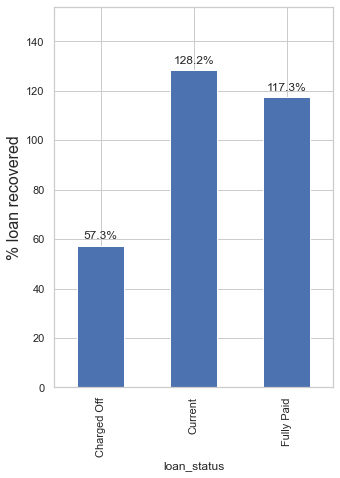

In [78]:
plt.figure(figsize=(5,7))
ax = (loan.groupby('loan_status').total_pymnt.sum() * 100 / loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

In [79]:
print("%.2f" % (loan.loc[loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan)))

13.37


About **13%** of loans in the dataset are **defaulted.**

In [80]:
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

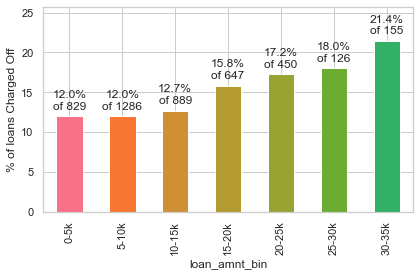

In [81]:
plotLoanStatus(loan, 'loan_amnt_bin')
plt.show()

**The % of charged off loans increases substancially as we go up the loan amount buckets.**

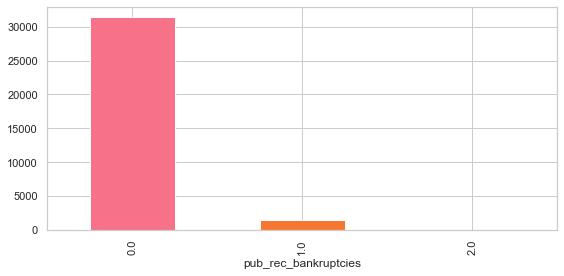

In [82]:
plt.figure(figsize=(8,4))

ax = loan.groupby('pub_rec_bankruptcies').loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))

plt.tight_layout()


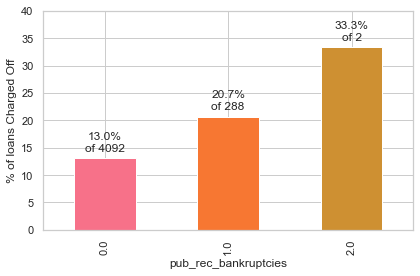

In [83]:
plotLoanStatus(loan, 'pub_rec_bankruptcies')
plt.show()

*** Very few loans are extended to people with prior record of bankruptcy**

In [84]:
(loan['grade'].value_counts(normalize=True)*100).sort_index()

A    25.001526
B    30.286848
C    20.280745
D    13.420812
E     7.448886
F     2.712847
G     0.848337
Name: grade, dtype: float64

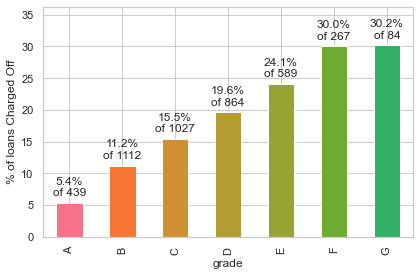

In [85]:
plotLoanStatus(loan, 'grade')
plt.show()

In [86]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
        #ax[3].set_title('Scatter Plot')
        #plt.scatter(df.index, df[col])
        #plt.show()
        
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

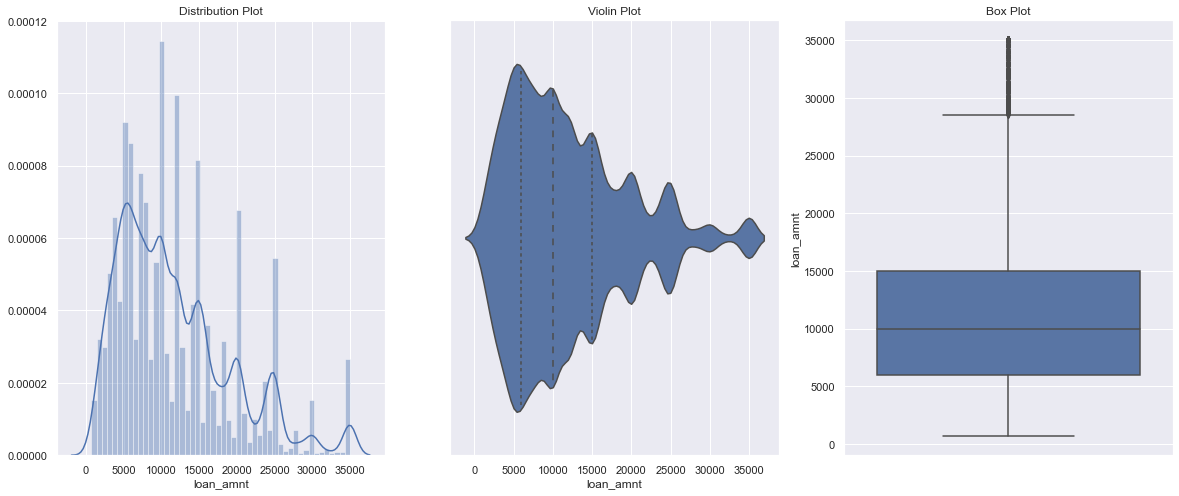

In [87]:
univariate(df=loan,col='loan_amnt',vartype=0)

Inference: **Heavily the loan amounts are distributed between 5000 to 15000 USD.**

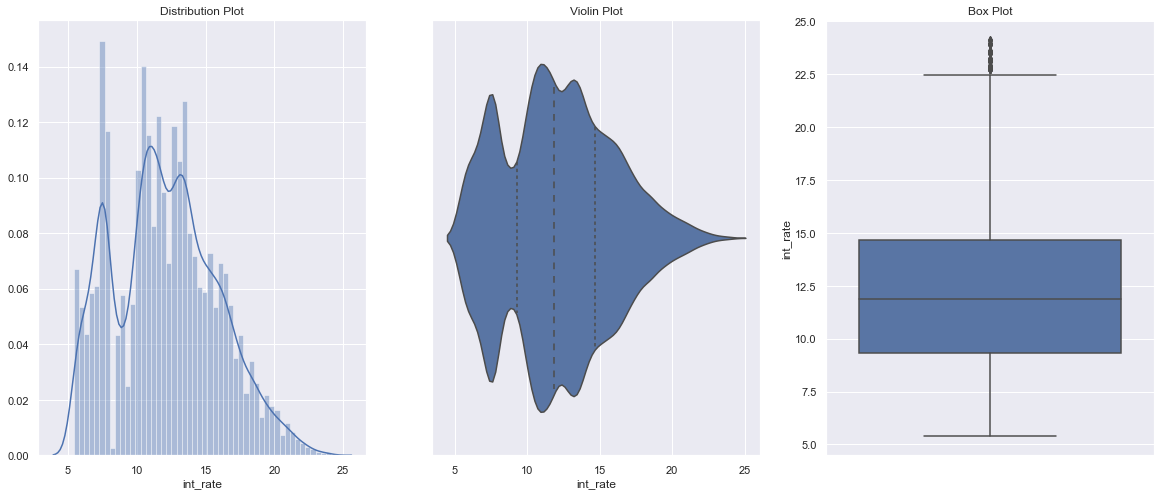

In [88]:
univariate(df=loan,col='int_rate',vartype=0)

Inference: **Heavily the interest rates are distributed between 10 to 15 %.**

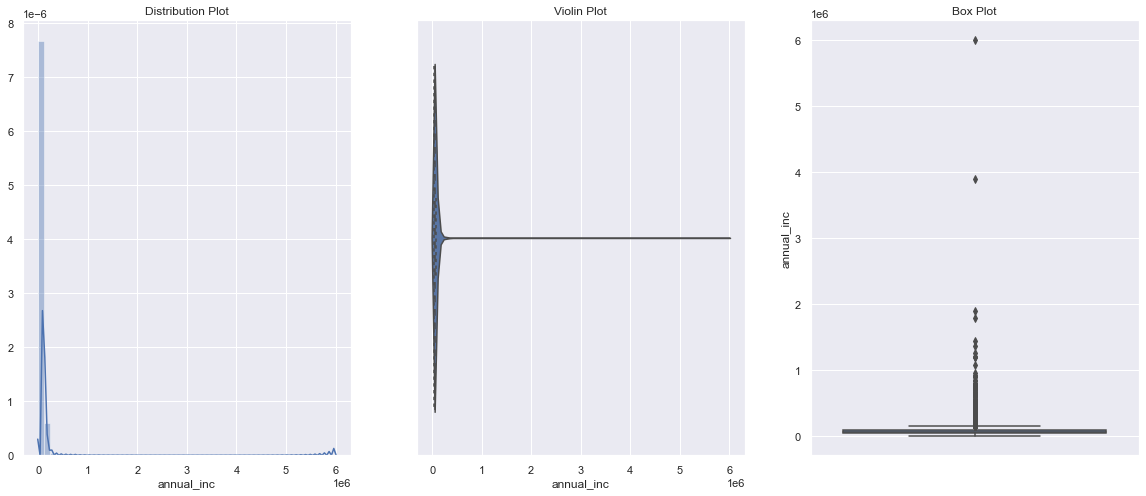

In [89]:
univariate(df=loan,col='annual_inc',vartype=0)

In [90]:
loan["annual_inc"].describe()

count    3.277000e+04
mean     6.986953e+04
std      6.468196e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [91]:
q = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"] < q]
loan["annual_inc"].describe()

count     32593.000000
mean      67347.309387
std       36691.653404
min        4000.000000
25%       42000.000000
50%       60000.000000
75%       83000.000000
max      291996.000000
Name: annual_inc, dtype: float64

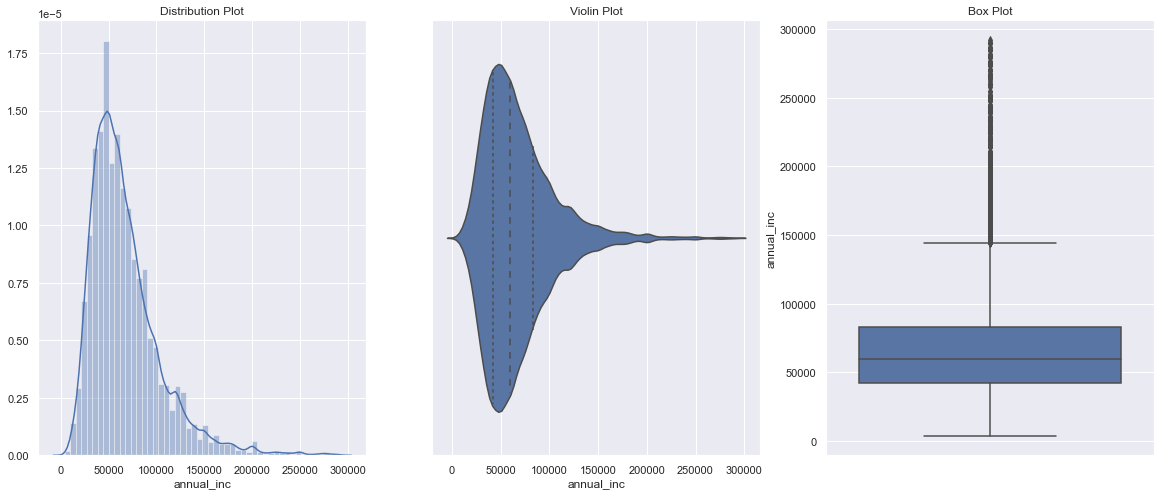

In [92]:
univariate(df=loan,col='annual_inc',vartype=0)

Inference: **Most of the applicants income are distributed between 40000 to 90000 USD.**

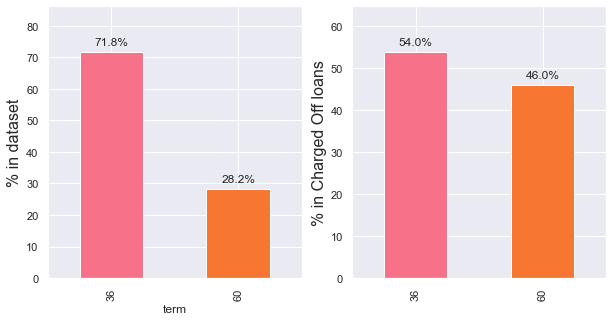

In [93]:
plt.figure(figsize=(10,5))
plot_percentages(loan, 'term')

<Figure size 1080x360 with 0 Axes>

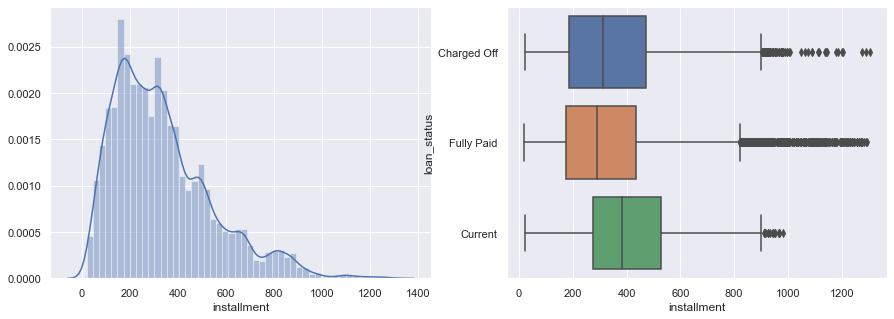

In [94]:
plt.figure(figsize=(15,5))
plot_distribution(loan, 'installment')

In [95]:
loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4365.0,351.459090,213.031712,22.79,188.02,312.92,473.4500,1305.19
Current,948.0,411.462215,198.912457,21.74,276.06,381.89,526.6925,981.45
Fully Paid,27280.0,329.502366,205.249622,20.22,174.38,289.09,433.7225,1295.21


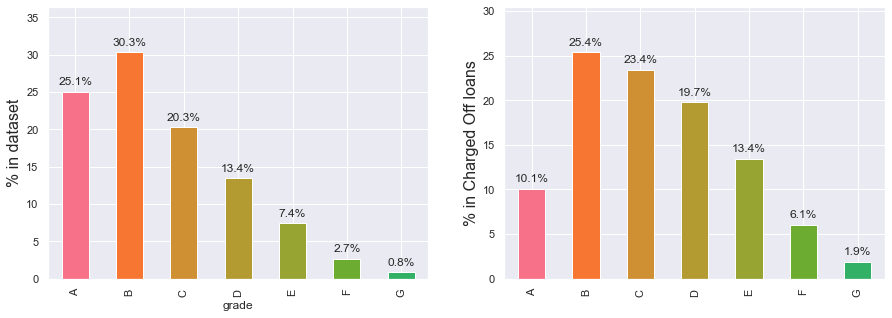

In [96]:
plt.figure(figsize=(15,5))
plot_percentages(loan, 'grade', True)

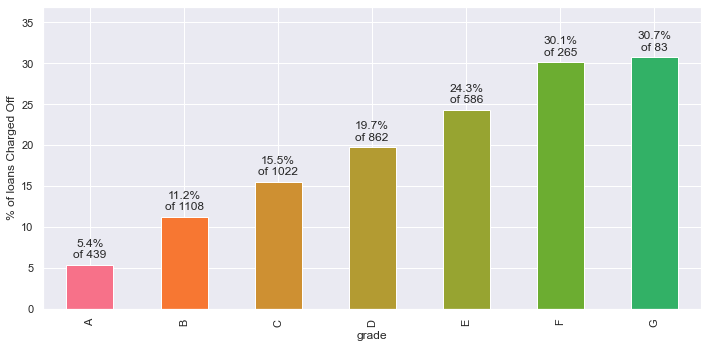

In [97]:
plt.figure(figsize=(10,5))
plotLoanStatus(loan, 'grade')

In [98]:
top10_emp_title = loan.emp_title.value_counts(normalize=False).head(10)
top10_emp_title

US Army              117
Bank of America       98
IBM                   58
AT&T                  53
Wells Fargo           52
Kaiser Permanente     52
UPS                   48
US Air Force          46
USAF                  44
Lockheed Martin       41
Name: emp_title, dtype: int64

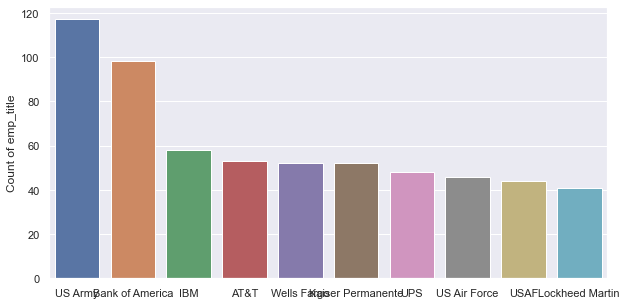

In [99]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

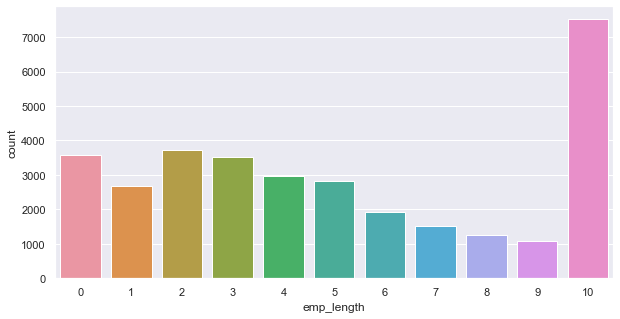

In [100]:
plt.figure(figsize=(10,5))
sns.countplot(loan['emp_length'], order=sorted(loan.emp_length.unique()))
plt.show()

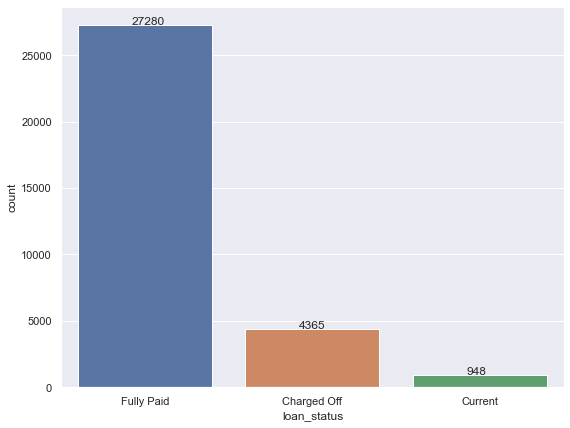

In [101]:
univariate(df=loan,col='loan_status',vartype=1)

Inference: **13.5% of the applicants are charged off**

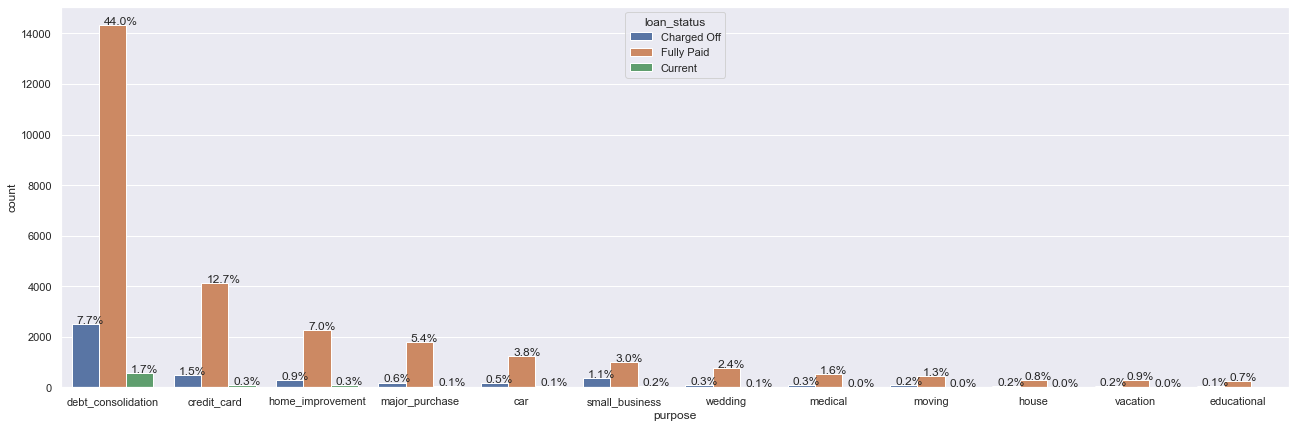

In [102]:
univariate(df=loan,col='purpose',vartype=1,hue='loan_status')

Inference: **More than 50% of the applicants applied for debt_consolidation (other loan)**

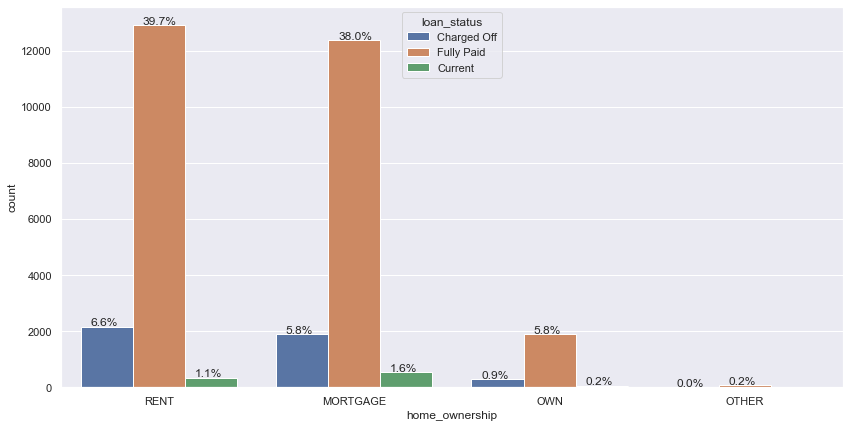

In [103]:
univariate(df=loan,col='home_ownership',vartype=1,hue='loan_status')

Inference: **42% of applicants are living in rented home and 45% applicants were mortagaged their home**

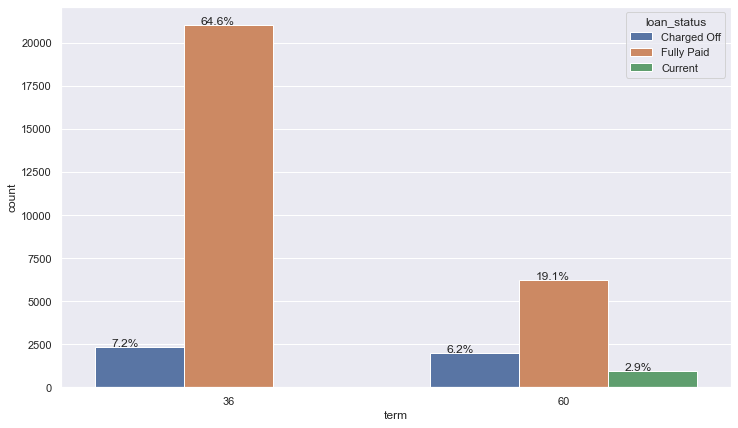

In [104]:
univariate(df=loan,col='term',vartype=1,hue='loan_status')

   Inference: **72% of applicants applied loan for 36 months term period.**

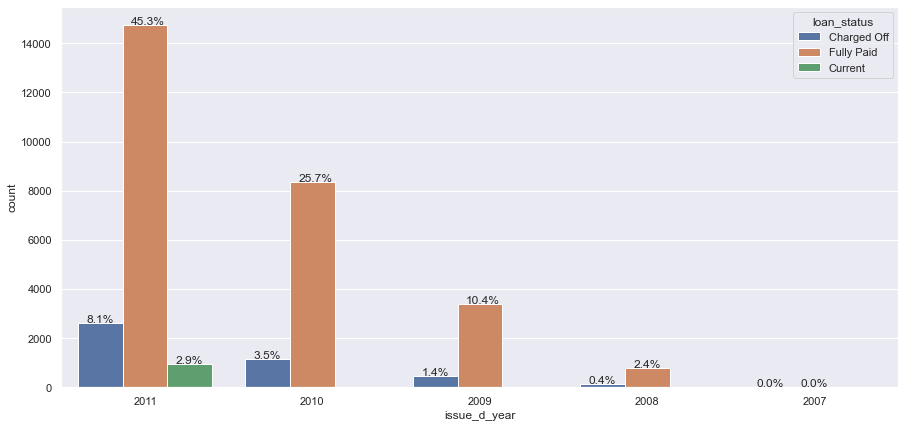

In [105]:
univariate(df=loan,col='issue_d_year',vartype=1,hue='loan_status')

In [106]:
(loan.issue_d_year.value_counts()*100)/len(loan)

2011    56.226797
2010    29.153499
2009    11.824625
2008     2.776670
2007     0.018409
Name: issue_d_year, dtype: float64

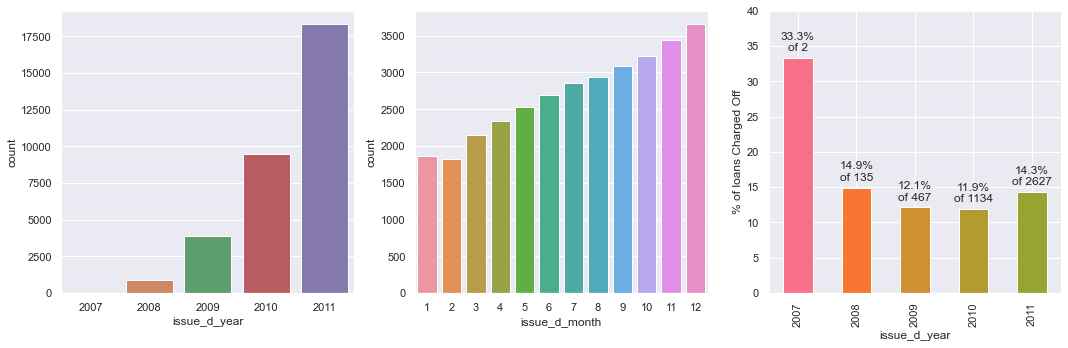

In [107]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(loan['issue_d_year'], order=sorted(loan.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(loan['issue_d_month'], order=sorted(loan.issue_d_month.unique()))

#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plotLoanStatus(loan, 'issue_d_year')

plt.show()


Inference: **Loan applicants are increasing every year, approx 56% of loan applicants received loans in 2011.**

**Summary**
<br>
Most loans are for 36 month term<br>
Very few loans are extended to people with prior record of bankruptcy<br>
debt_consolidation is by far the largest 'purpose' for seeking a loan<br>
Most approved loans are high grade<br>
Loans Charged Off have high installment on average<br>
Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans<br>
Grade D, E, F, G loans are less safe.<br>
Nearly 30% of all loans in Grades F and G are default.<br>
Max of the loan takers are from the US Army, then Bank of America follwed by IBM and AT&T<br>
Maximum loan taker have an employment length of more than 10 years.


### Bivariate Analysis

**Loan amount vs year issued**

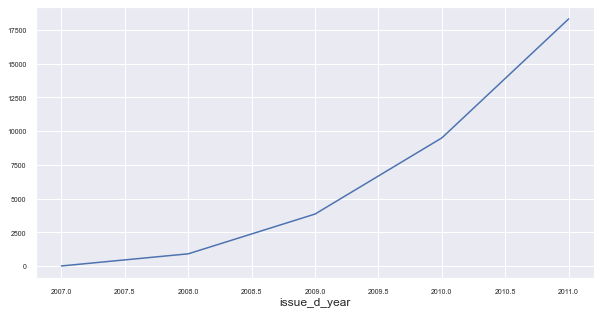

In [108]:
plt.figure(figsize=(10,5))
loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

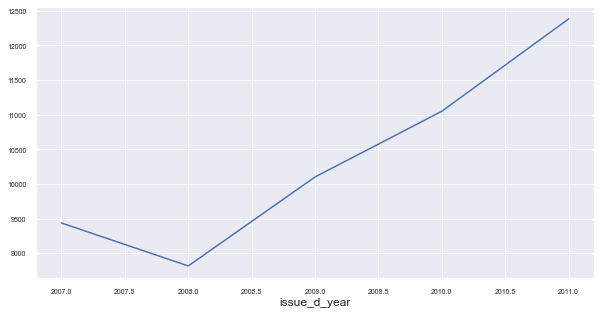

In [109]:
plt.figure(figsize=(10,5))
loan.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

**Average loan amount dropped sharply when subprime mortgage crisis hit**


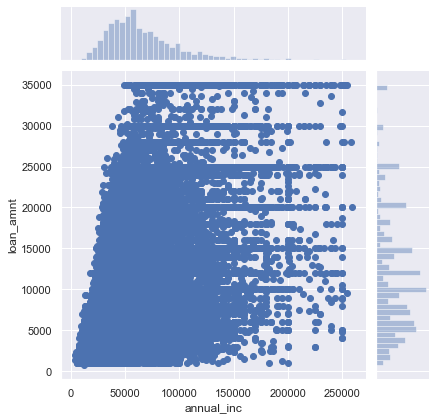

In [110]:
sns.jointplot('annual_inc', 'loan_amnt', loan.loc[loan['annual_inc']<260000])
plt.show()

**There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans.**

**Loan Amount vs grade**

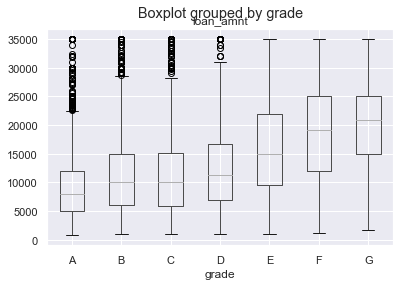

In [111]:
loan.boxplot(column='loan_amnt', by='grade')
plt.show()

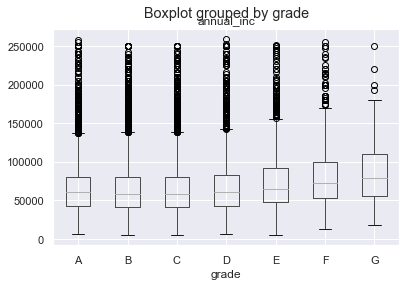

In [112]:
loan.loc[loan['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

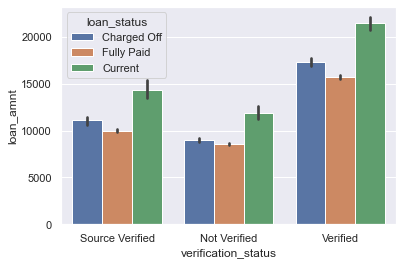

In [113]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)

Higher loan amounts are Verified more often<br>
We already know that larger loans are less in number, but see a higher charge off rate<br>

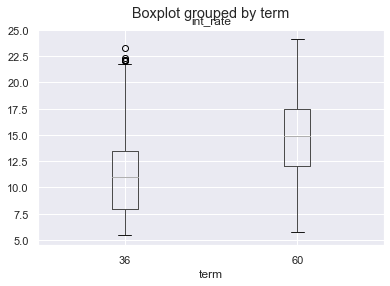

In [114]:
loan.boxplot(column='int_rate', by='term')
plt.show()

Intrest rates are besed on term. Larger amounts were seen to be given for higher term.

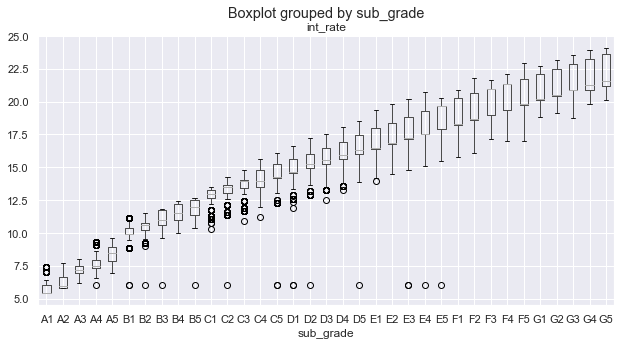

In [115]:
loan.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

Intrest rates varies directly with the subgrade

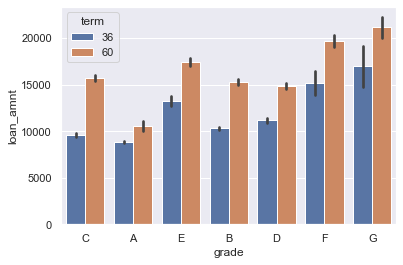

In [116]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan, estimator=np.mean)
plt.show()

Higher loan amount are associated with lower grade for longer terms

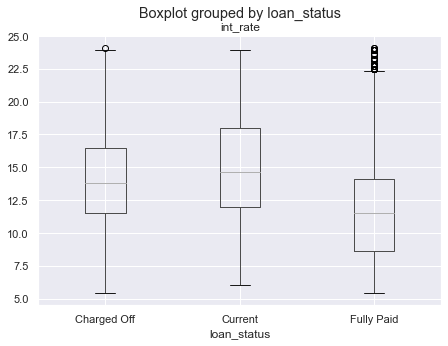

In [117]:
loan.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

Loans at a higher intrest rate are more likely to be Charged Off.

**revol_util Vs grade Vs Loan Status**

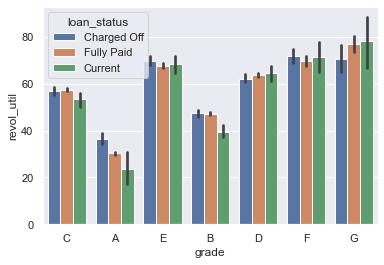

In [118]:

sns.barplot(x='grade', y='revol_util', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

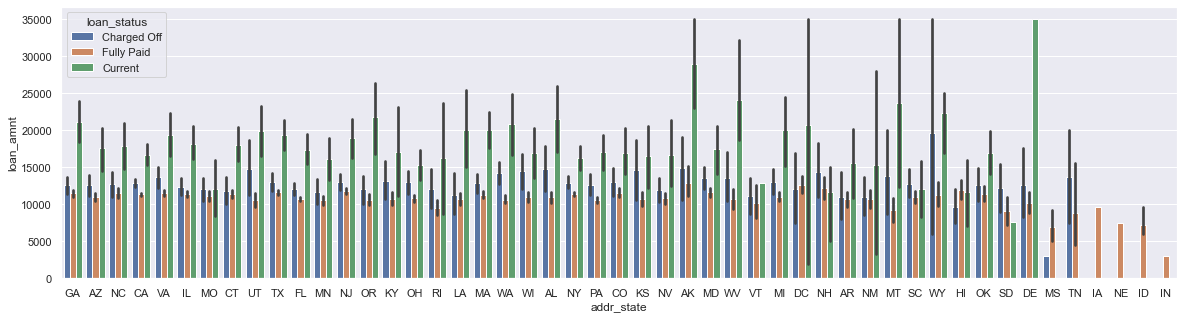

In [119]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan, estimator=np.mean)
plt.show()

**Purpose of loan vs loan amount**

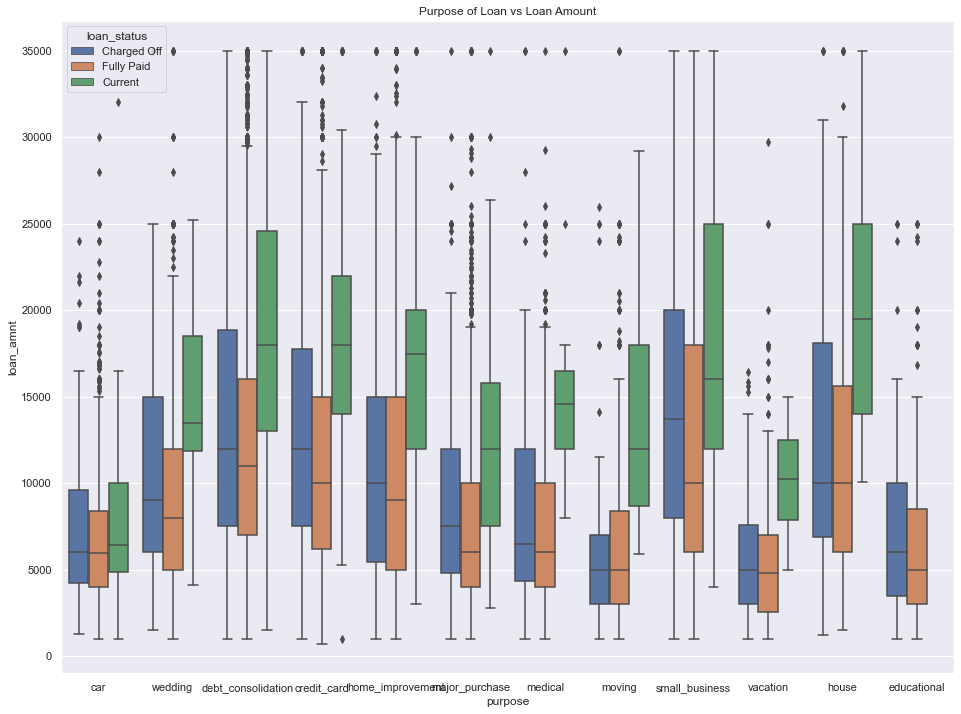

In [120]:
plt.figure(figsize=(16,12))
sns.boxplot(data =loan, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [121]:
loan_cor = loan[['loan_amnt','int_rate','installment','annual_inc','dti','loan_income_ratio','revol_util']]

In [122]:
loan_correlation = loan_cor.corr()
loan_correlation

,loan_amnt,int_rate,installment,annual_inc,dti,loan_income_ratio,revol_util
loan_amnt,1.000000,0.319811,0.925663,0.410774,0.077230,0.624107,0.083913
int_rate,0.319811,1.000000,0.292090,0.078352,0.116131,0.229643,0.472868
installment,0.925663,0.292090,1.000000,0.409316,0.065439,0.559231,0.117029
annual_inc,0.410774,0.078352,0.409316,1.000000,-0.128336,-0.318720,0.039166
dti,0.077230,0.116131,0.065439,-0.128336,1.000000,0.161818,0.277240
loan_income_ratio,0.624107,0.229643,0.559231,-0.318720,0.161818,1.000000,0.052718
revol_util,0.083913,0.472868,0.117029,0.039166,0.277240,0.052718,1.000000


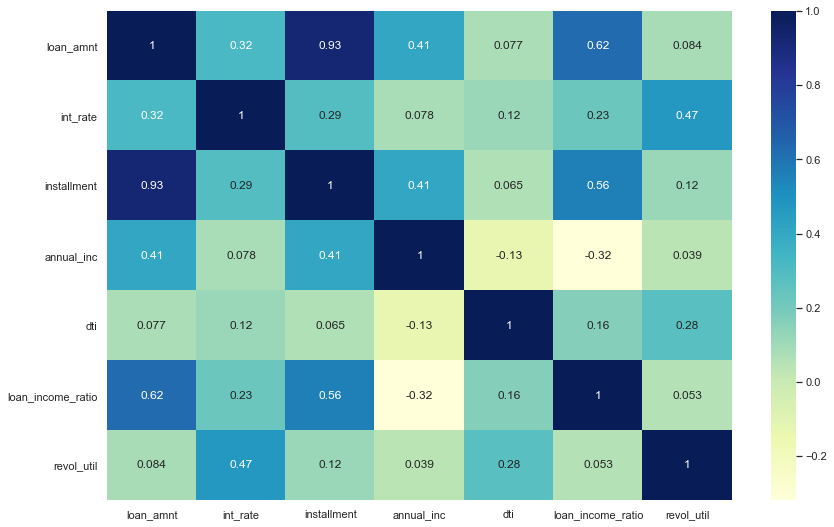

In [123]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True,cmap="YlGnBu")
plt.show()

**Loan_amnt highly correlated to installment**

In [124]:
loanstatus=loan.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loan.loc[loan['loan_status']=='Charged Off']

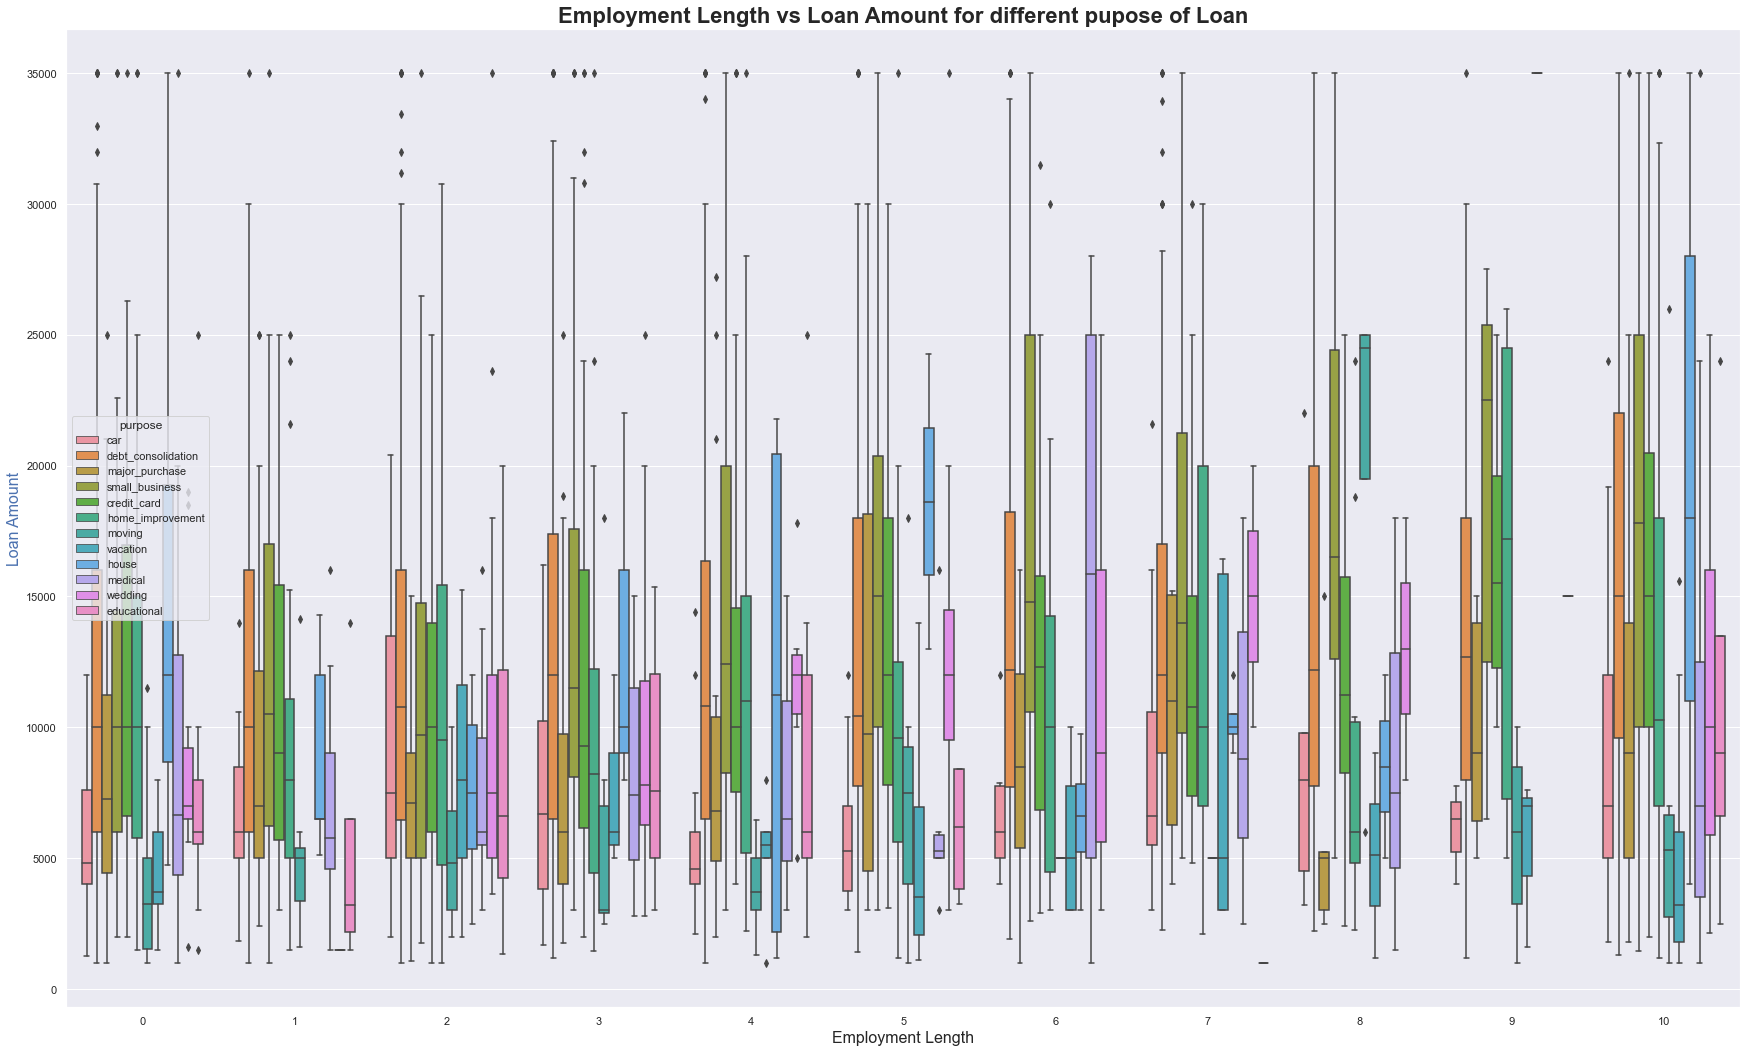

In [125]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

**Categorical Variables vs Probability of Charged Off**<br>
The main motive of this use case to find what parameters are impacting the most on Loan Status that is if a applicant will successfully complete the loan term or will charge off.<br>

So we will be using a new term now Probability of Charged Off that will be equal to :<br>

ProbabilityofChargedOff= NumberofApplicantswhochargedoff/TotalNo.ofApplicants

**Probability of Charge off**

In [126]:
def crosstab(df,col):
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [127]:
# Probability of charge off
def bivariate_prob(df,col,stacked= True):
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

**Probability of location**

In [128]:
filter_states = loan.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loan.drop(labels = loan[loan.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
addr_state,,,,,
NH,22,3,109,134,0.164
NJ,235,50,1258,1543,0.152
NM,28,3,124,155,0.181
NV,83,15,307,405,0.205
NY,383,90,2594,3067,0.125
OH,123,38,872,1033,0.119
OK,32,10,209,251,0.127
OR,60,13,305,378,0.159
PA,141,44,1064,1249,0.113


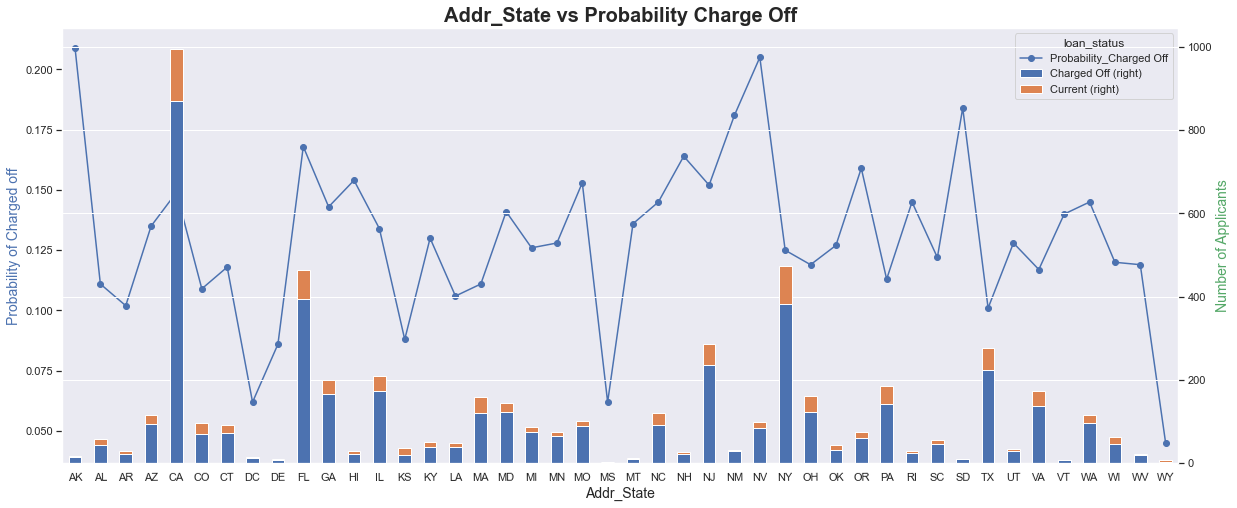

In [129]:
states = crosstab(loan_filter_states,'addr_state')
display(states.tail(20))

bivariate_prob(df =loan_filter_states,col ='addr_state')

Inference: **NV has high probability of charegoff which is 20%**

**Probability of Purpose of Loan**

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
purpose,,,,,
car,149,48,1244,1441,0.103
credit_card,478,100,4129,4707,0.102
debt_consolidation,2503,558,14339,17400,0.144
educational,45,0,230,275,0.164
home_improvement,291,89,2278,2658,0.109
house,52,13,273,338,0.154
major_purchase,188,35,1776,1999,0.094
medical,95,12,523,630,0.151
moving,78,6,440,524,0.149


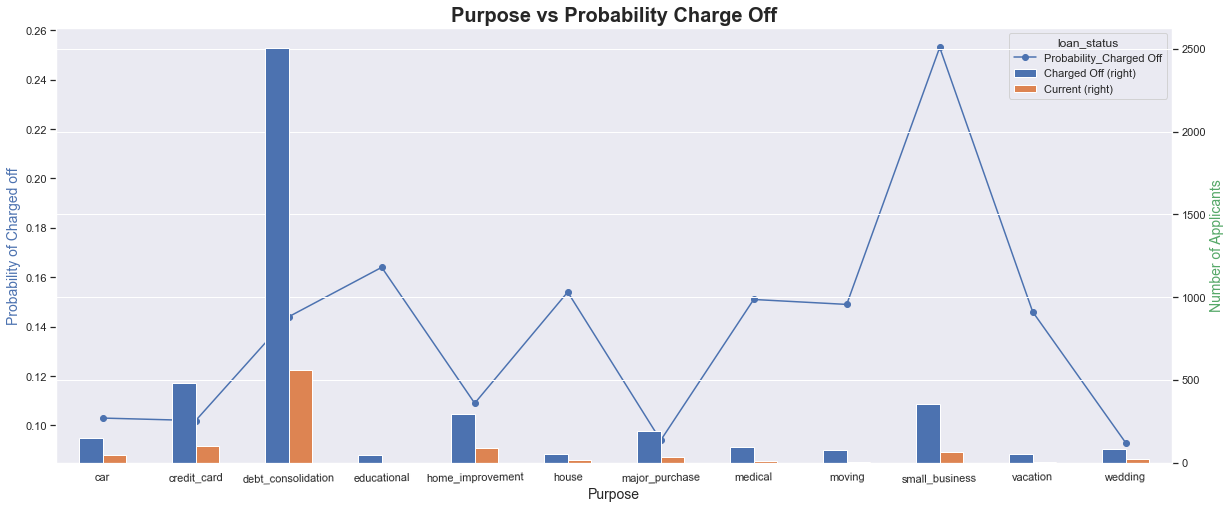

In [130]:
purpose = crosstab(loan,'purpose')
display(purpose)

bivariate_prob(df =loan,col ='purpose',stacked=False)

Inference: **Applicants who has taken the Loan for 'small business' has the highest probabilty of charge off of around 
25%.**

**Probability of Grade/Subgrade**

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
grade,,,,,
A,439,26,7702,8167,0.054
B,1108,282,8494,9884,0.112
C,1022,228,5354,6604,0.155
D,862,186,3326,4374,0.197
E,586,153,1675,2414,0.243
F,265,59,556,880,0.301
G,83,14,173,270,0.307


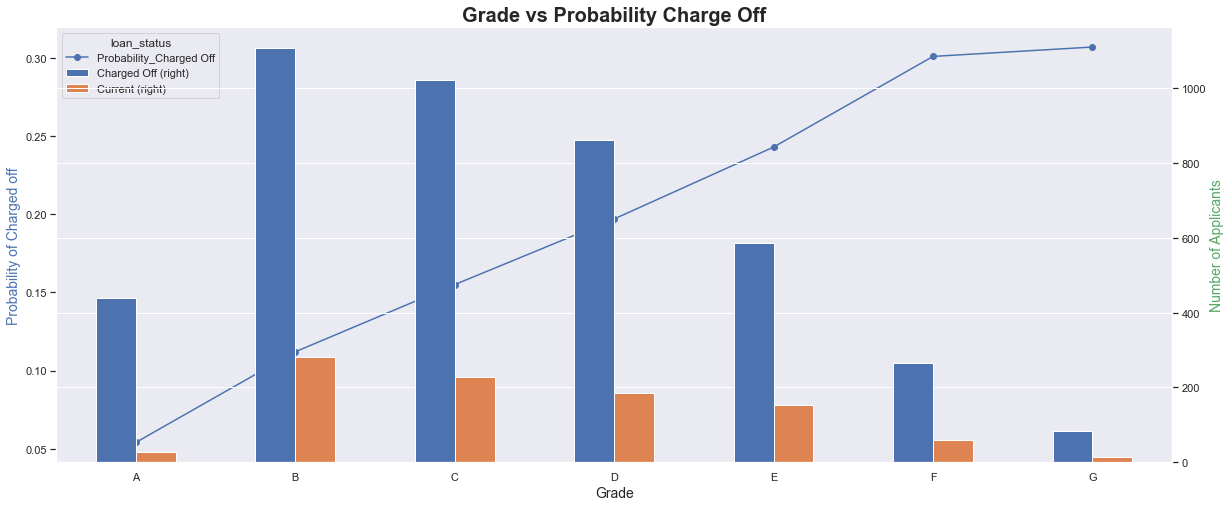

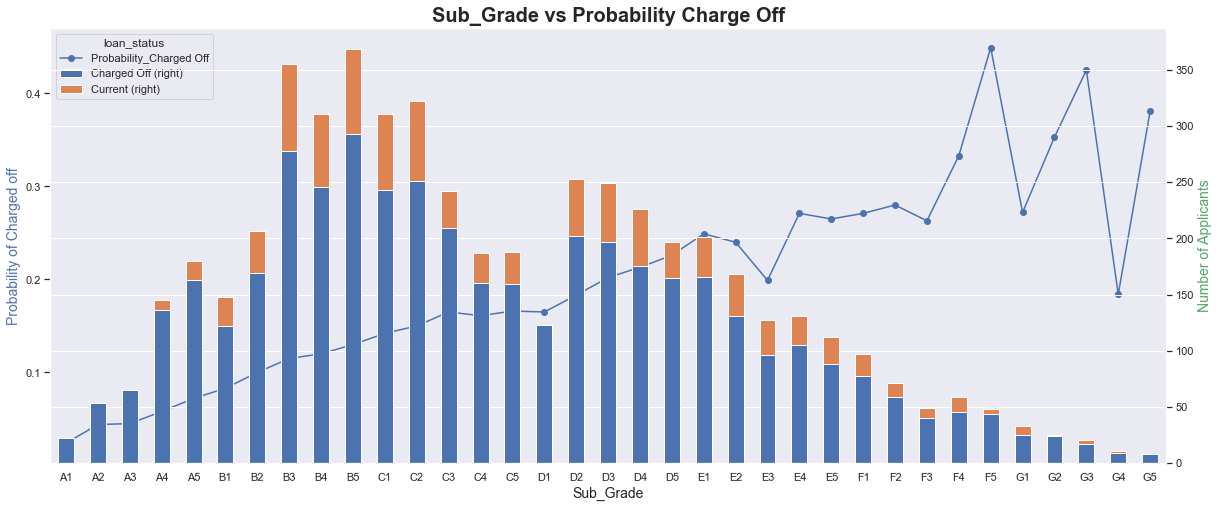

In [131]:
grade = crosstab(loan,'grade')
display(grade)

bivariate_prob(df =loan,col ='grade',stacked=False)
bivariate_prob(df =loan,col ='sub_grade')

Inference: **G grade has high probability of charegoff and the charge off is increasing from A to G grade**

**Probability of Income range**

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,,
0-25000,291,12,1392,1695,0.172
25000-50000,1643,262,8770,10675,0.154
50000-75000,1376,307,8568,10251,0.134
75000-100000,605,192,4583,5380,0.112
100000 and above,450,175,3967,4592,0.098


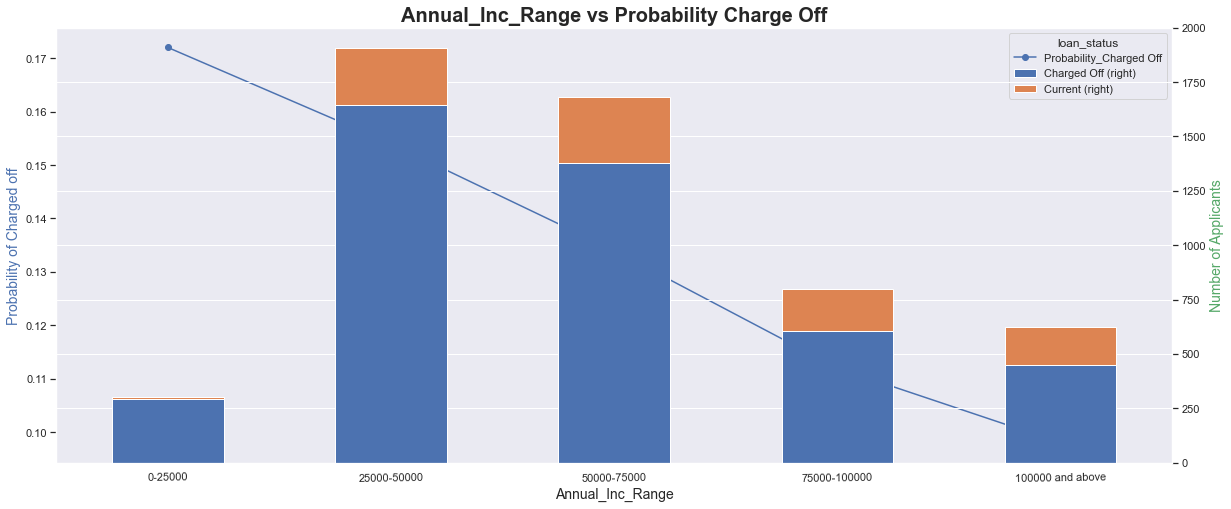

In [132]:
annual_inc_range = crosstab(loan,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df =loan,col ='annual_inc_range')

Inference: **Income is inversely correlated to default, higher the income, less the default and vice versa. Lower income group has high probability of charegoff**

**Probability of Interest rate**

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,,
0-7.5,189,4,4219,4412,0.043
7.5-10,395,52,5126,5573,0.071
10-12.5,949,221,6660,7830,0.121
12.5-15,1131,220,6187,7538,0.150
15 and above,1451,368,4674,6493,0.223


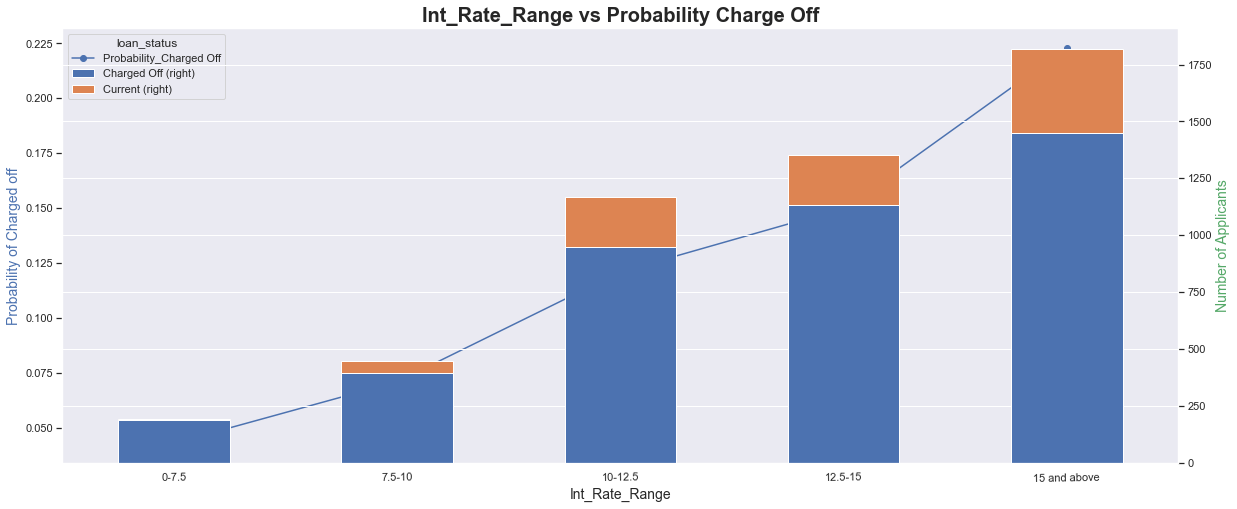

In [133]:
int_rate_range = crosstab(loan,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan,col ='int_rate_range')

Inference: **As the interest rate increases the probability of default is increasing, highest probability of charge off at 15% and above**

**Probability of Employment Length**

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
emp_length,,,,,
0,464,62,3062,3588,0.129
1,360,61,2250,2671,0.135
2,452,86,3183,3721,0.121
3,457,65,2992,3514,0.130
4,375,80,2518,2973,0.126
5,379,76,2357,2812,0.135
6,259,52,1616,1927,0.134
7,220,53,1248,1521,0.145
8,171,34,1060,1265,0.135


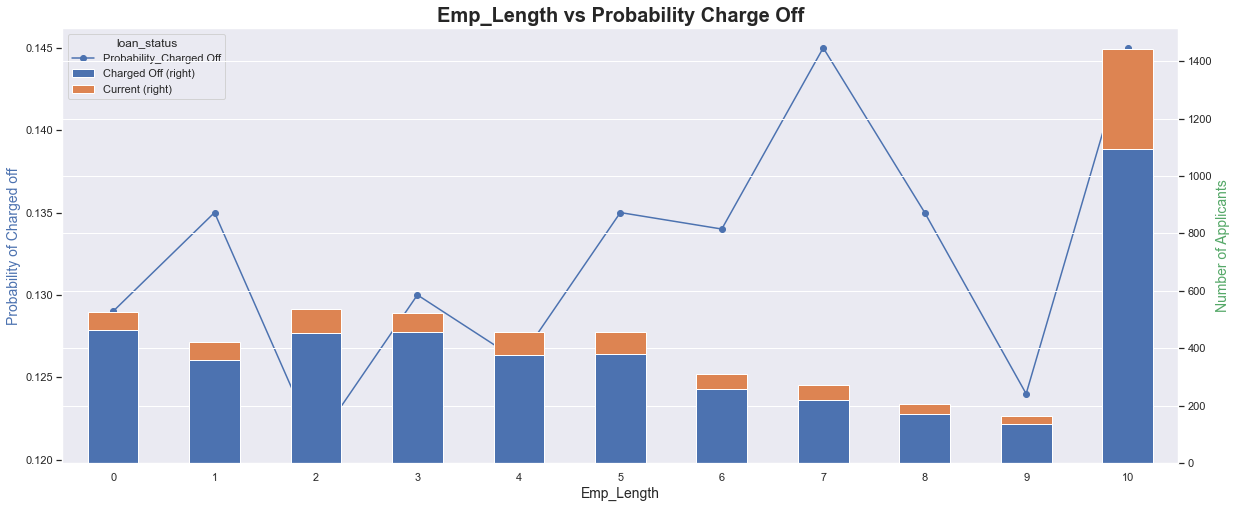

In [134]:
emp_length = crosstab(loan,'emp_length')
display(emp_length)

bivariate_prob(df =loan,col ='emp_length')

Inference: **Applicants who have 7 years and 10 years of experience are having high probability of charegoff**

**Probability of Term**

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
term,,,,,
36,2357,0,21047,23404,0.101
60,2008,948,6233,9189,0.219


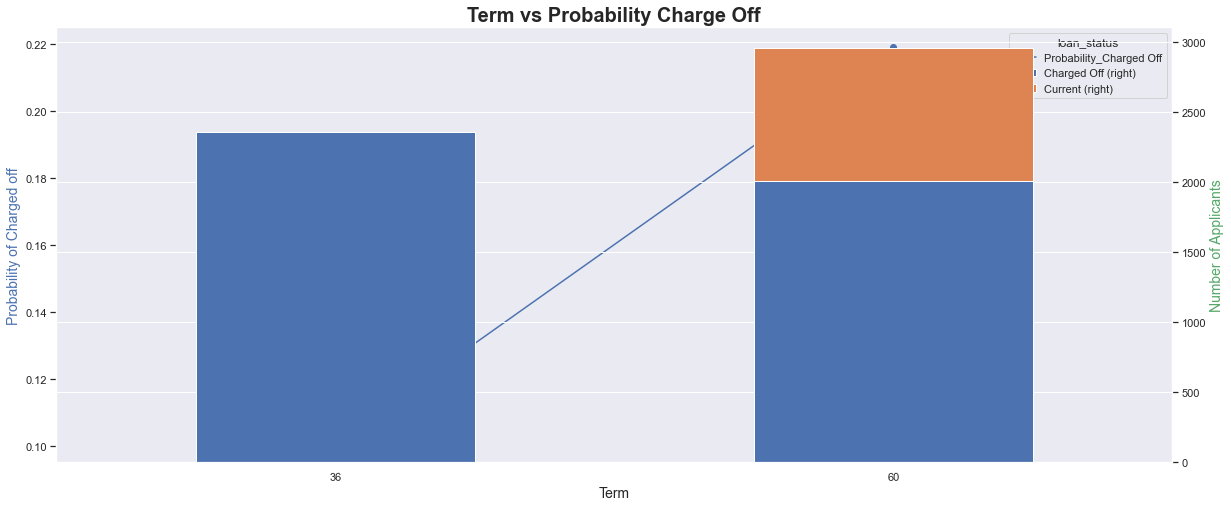

In [135]:
term = crosstab(loan,'term')
display(term)

bivariate_prob(df =loan,col ='term')

Inference: **As the term increases the probability of default is also increasing**

**Probability of verfication status**

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
verification_status,,,,,
Not Verified,1496,181,11505,13182,0.113
Source Verified,1174,252,7051,8477,0.138
Verified,1695,515,8724,10934,0.155


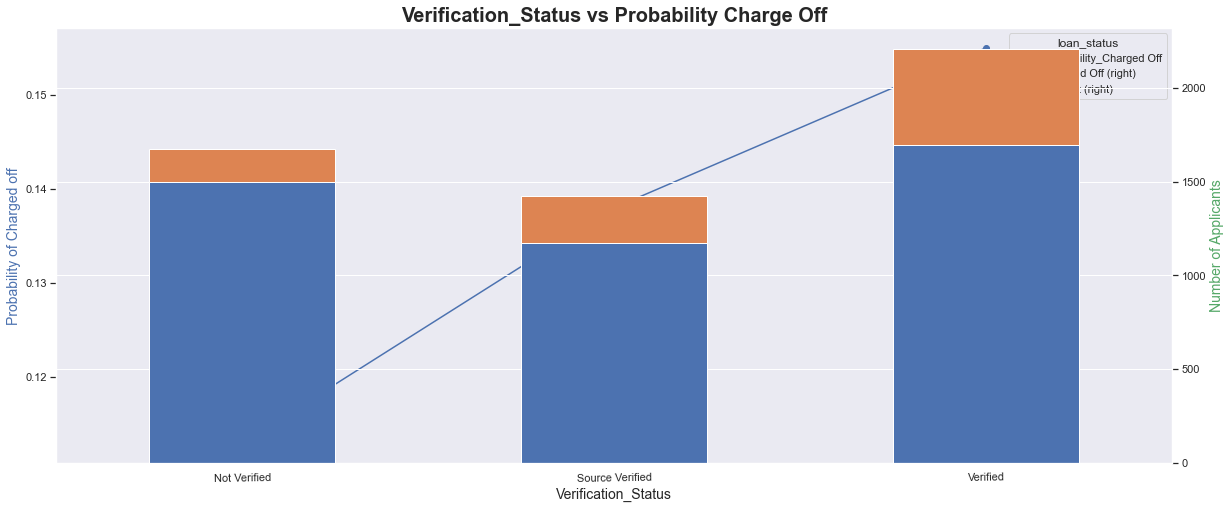

In [136]:
verification_status = crosstab(loan,'verification_status')
display(verification_status)

bivariate_prob(df =loan,col ='verification_status')

Inference: **As the term increases the probability of default is also increasing**

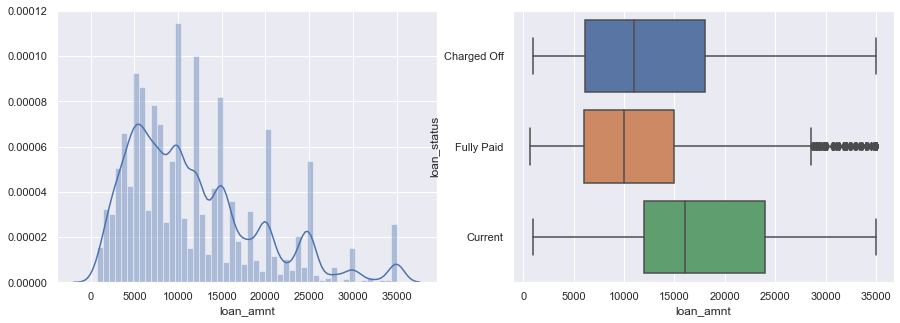

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
loan_amnt_bin,,,,,
0-5k,827,59,6013,6899,0.120
5-10k,1284,108,9301,10693,0.120
10-15k,886,262,5834,6982,0.127
15-20k,644,224,3193,4061,0.159
20-25k,445,141,1987,2573,0.173
25-30k,126,71,493,690,0.183
30-35k,153,83,459,695,0.220


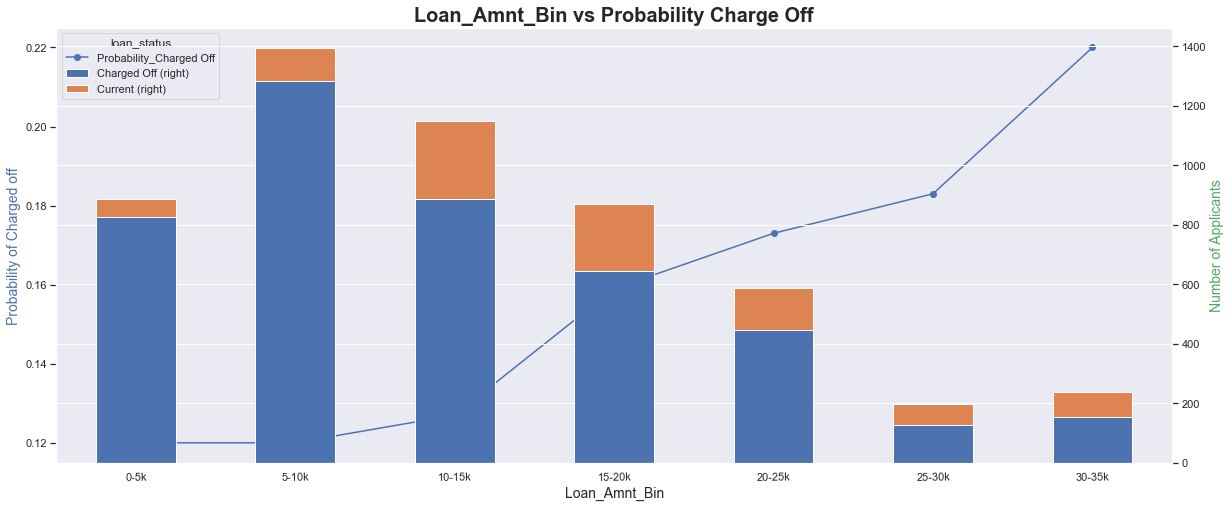

In [137]:
plot_distribution(loan, 'loan_amnt')
loan_amnt_bin = crosstab(loan,'loan_amnt_bin')
display(loan_amnt_bin)

bivariate_prob(df =loan,col ='loan_amnt_bin')

**Conclusion**<br>
**Target Variable**: Loan status<br>
**Variable to consider before loan approval**:
1. Loan Grade<br>
2. Purpose of the loan<br>
3. Interest Rate<br>
4. Loan Term<br>
5. Annual Income<br>